## Predict weather for a city with the help of historic data: Exploratory data analysis and Inferential Statistics

     Main Concepts: Apply inferential statistics and hypothesis testing

     Learning Objectives:

        Understand the fundamentals of statistical inference and hypothesis testing
        Perform hypothesis testing for data to identify statistical significance
        Understand how hypothesis testing is applied



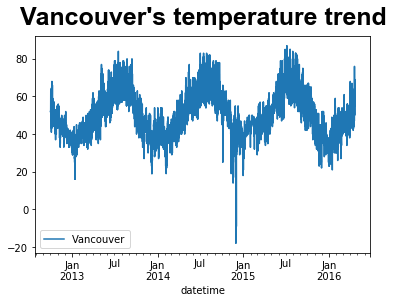

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import scipy.stats as stats

# Dataset being loaded as dataframe
file = 'temperature_train.csv'

# datetime column parsed as Datetime type, datetime column as index
df = pd.read_csv(file, parse_dates=['datetime'], index_col='datetime')

# Deleting unnamed column which is introduced from csv file
df = df.drop(df.columns[[0]], axis=1)

df = df.iloc[:, :-6] # deleting non US cities, other than Montreal and Vancouver

# Convert Kelvin to Fahrenheit
df = df.applymap(lambda x: int(9/5 * (x-273) + 32))

df2013 = df[df.index.year == 2013]
df2014 = df[df.index.year == 2014]
df2015 = df[df.index.year == 2015]

# November temperatures in 2013, 2014, 2015 at 7pm for Vancouver
df_nov_2013_7pm = df2013[(df2013.index.month == 11) & (df2013.index.hour == 19)][['Vancouver']]
df_nov_2014_7pm = df2014[(df2014.index.month == 11) & (df2014.index.hour == 19)][['Vancouver']]
df_nov_2015_7pm = df2015[(df2015.index.month == 11) & (df2015.index.hour == 19)][['Vancouver']]
dfs = [df_nov_2013_7pm, df_nov_2015_7pm]
df_nov_201315_7pm = pd.concat(dfs)

title_font = {'fontname':'Arial', 'size':'25', 'color':'black', 'weight':'bold',
  'verticalalignment':'bottom'} # Bottom vertical alignment for more space

#Temperature trend in Vancouver
#df_pit = df.iloc[:, 24:25]
df_van = df[['Vancouver']]
#ax1 = df_van.plot()
df_van.plot()
plt.title('Vancouver\'s temperature trend', **title_font)
plt.show()
#ax1.set_title('Pittsburgh\'s temperature trend')


Text(0.5,1,"Vancouver's dip in temperature in Nov 2014")

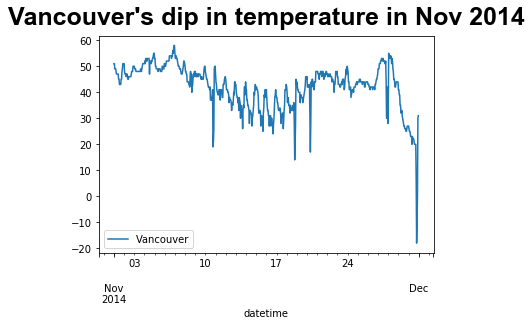

In [27]:

#df_van = df2014.iloc[7950: 8100, :1]
df_nov_2014 = df2014[df2014.index.month == 11][['Vancouver']]
ax = df_nov_2014.plot()
#print(df_nov_2014[df_nov_2014.Vancouver < 0])
ax.set_title('Vancouver\'s dip in temperature in Nov 2014', **title_font)

#### Looking at the temperature trend of Vancouver, we can see there is significant drop in temperature in November 2014.
#### We will investigate this trend by the significance test. We have to conduct two tail test. 

#### We state the hypothesis as 
#### Ho : There is no change in November 2014 temperature and November temperature in 2013 and 2015
#### Ha : There is change in November 2014 temperature and November temperatures in 2013 and 2015 
#### Let the significance value, alpha = 0.05

In [19]:
# Calculate t-statistic 
mean_2014 = np.mean(df_nov_2014_7pm.Vancouver)
mean_201315 = np.mean(df_nov_201315_7pm.Vancouver)

diff_in_mean = mean_2014 - mean_201315
var_2014 = np.var(df_nov_2014_7pm.Vancouver)
var_201315 = np.var(df_nov_201315_7pm.Vancouver)

std = np.sqrt(var_2014/len(df_nov_2014_7pm) + var_201315/len(df_nov_201315_7pm) )

# population means have to be same for no change in temperatures 
t_stat = (diff_in_mean - 0)/std
p_value = stats.t.sf(np.abs(t_stat), len(df_nov_2014_7pm)+len(df_nov_201315_7pm)-2)*2
print("The p value: %7.4f" % p_value )

The p value:  0.1633


#### The p-value, 0.16 is greater than significance value of 0.05. By this we can reject the null hypothesis meaning there is indeed change in November temperature of 2014 and November temperatures of 2013 and 2015.
#### This can be explained by near record temperature in November 2014.